## 1. Exploratory Data Analysis

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor

from scipy import stats

sns.set_style("whitegrid")

In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 465.5 kB/s eta 0:04:29
   ---------------------------------------- 0.1/124.9 MB 847.9 kB/s eta 0:02:28
   ---------------------------------------- 0.3/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.5/124.9 MB 1.9 MB/s eta 0:01:06
   ---------------------------------------- 0.7/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.9/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.0/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.2/124.9 MB 2.7 MB/s eta 0:00:47
   ---------------------------------------- 1.3/124.9 MB 2.6 MB/s eta 0:00:48
    --------------------------------------- 1.6/124.9 MB 3.0 MB/s eta 0:

In [5]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.1/101.1 MB 154.0 kB/s eta 0:10:57
   ---------------------------------------- 0.1/101.1 MB 186.7 kB/s eta 0:09:01
   ---------------------------------------- 0.1/101.1 MB 186.7 kB/s eta 0:09:01
   ---------------------------------------- 0.1/101.1 MB 191.1 kB/s eta 0:08:49
   ---------------------------------------- 0.1/101.1 MB 210.4 kB/s eta 0:08:00
   -----------

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%201/data/dataset.csv",index_col=0)
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 300153 observations for 11 predictors.


airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [42]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [43]:
df.describe(include='all')

airline  flight source_city departure_time   stops arrival_time  \
count    300153  300153      300153         300153  300153       300153   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127859    3235       61343          71146  250863        91538   
mean        NaN     NaN         NaN            NaN     NaN          NaN   
std         NaN     NaN         NaN            NaN     NaN          NaN   
min         NaN     NaN         NaN            NaN     NaN          NaN   
25%         NaN     NaN         NaN            NaN     NaN          NaN   
50%         NaN     NaN         NaN            NaN     NaN          NaN   
75%         NaN     NaN         NaN            NaN     NaN          NaN   
max         NaN     NaN         NaN            NaN     NaN          NaN   

       destination_city    class       duration      days_left          price  
count            300153   300153  300153.000000  300153.000000  300153.000000  
unique                6        2            NaN            NaN            NaN  
top              Mumbai  Economy            NaN            NaN            NaN  
freq              59097   206666            NaN            NaN            NaN  
mean                NaN      NaN      12.221021      26.004751   20889.660523  
std                 NaN      NaN       7.191997      13.561004   22697.767366  
min                 NaN      NaN       0.830000       1.000000    1105.000000  
25%                 NaN      NaN       6.830000      15.000000    4783.000000  
50%                 NaN      NaN      11.250000      26.000000    7425.000000  
75%                 NaN      NaN      16.170000      38.000000   42521.000000  
max                 NaN      NaN      49.830000      49.000000  123071.000000

In [44]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

<Axes: xlabel='price'>

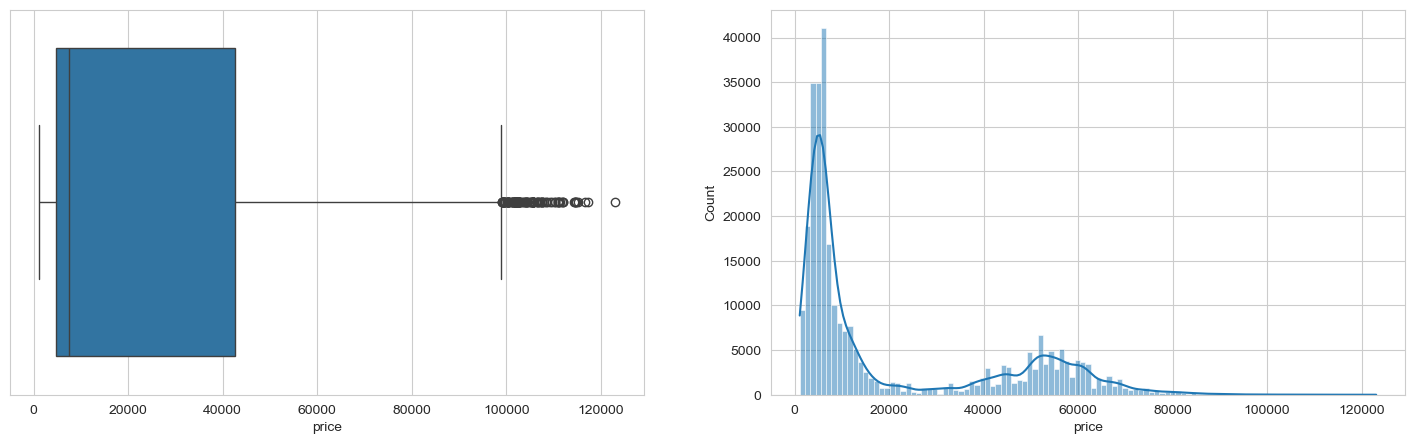

In [45]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

### How does the ticket price vary between Economy and Business class?
###### To visualize the difference between the two kind of tickets, I will plot the prices for the two prices for both business and economy tickets for the different companies.

Text(0.5, 1.0, 'Airline prices based on the class and company')

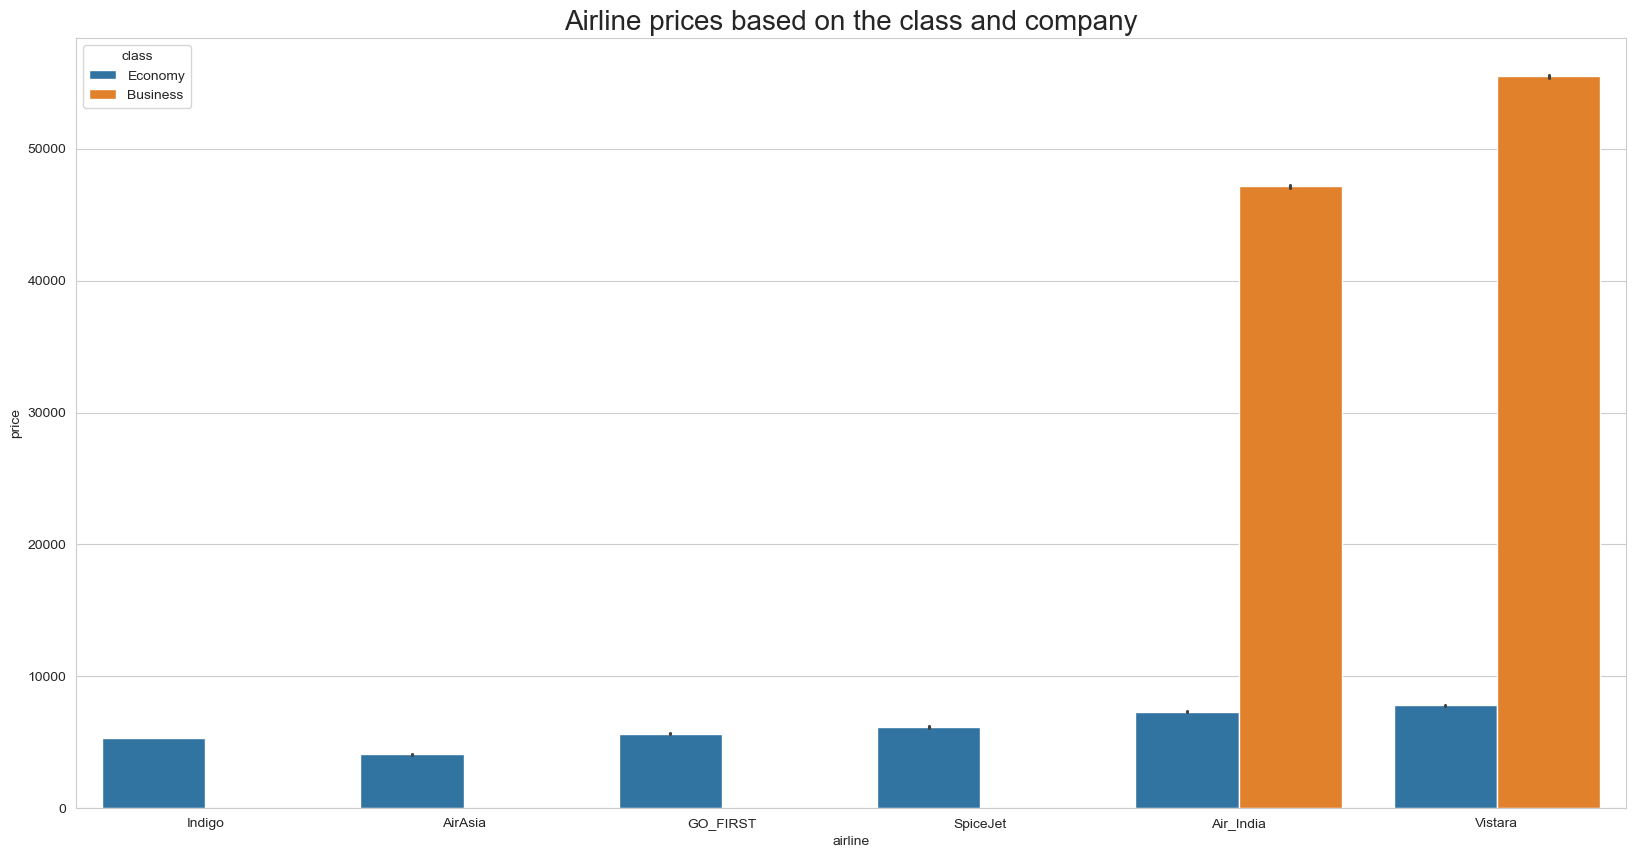

In [46]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

### Does price vary with Airlines?Â¶
To compare the prices between the companies we will only compare the same kind of tickets since the previous question showed that the class has a big impact on the final price.

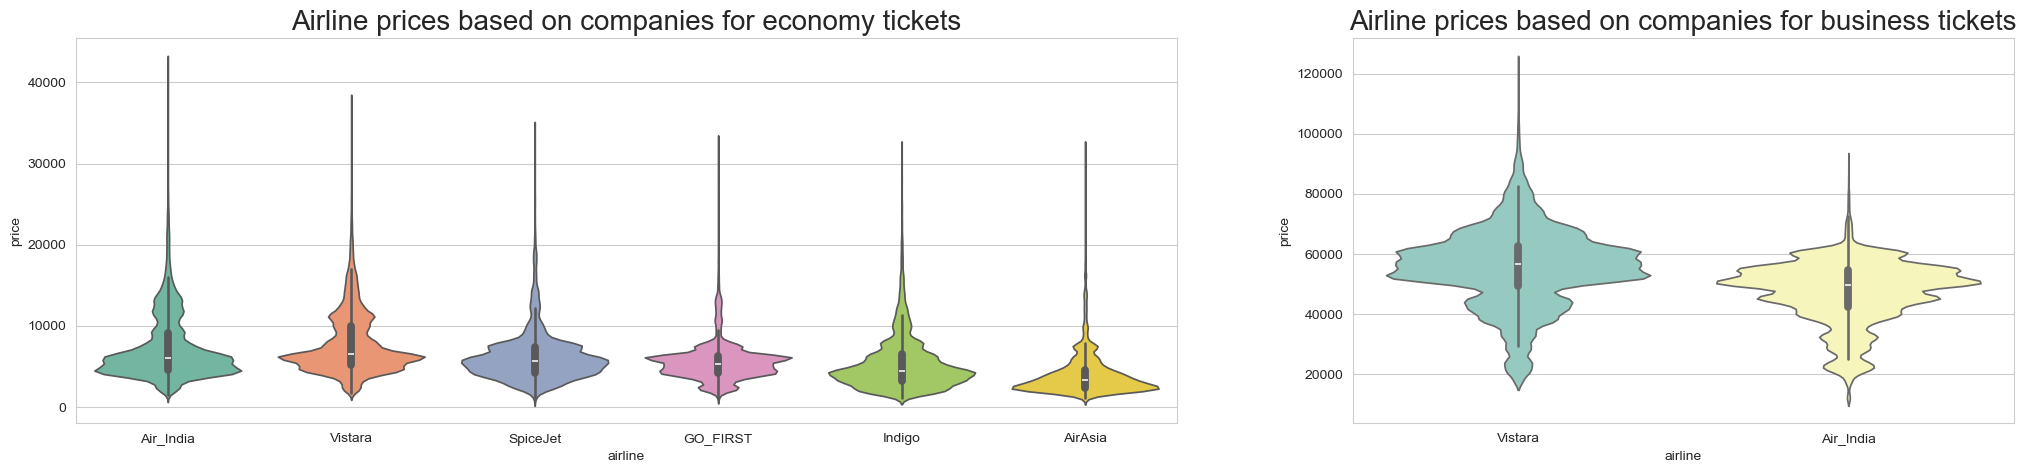

In [47]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

# Economy class plot
sns.violinplot(y="price", x="airline", 
               hue="airline",  # Use airline as the hue to apply different colors
               data=df.loc[df["class"] == 'Economy'].sort_values("price", ascending=False), 
               ax=axs[0], 
               palette="Set2",
               dodge=False,  # Keeps the violins in the same positions without splitting by hue
               legend=False)  # Disable the hue legend
axs[0].set_title("Airline prices based on companies for economy tickets", fontsize=20)
axs[0].legend([],[], frameon=False)  # Manually remove the legend

# Business class plot
sns.violinplot(y="price", x="airline", 
               hue="airline",  # Use airline as the hue to apply different colors
               data=df.loc[df["class"] == 'Business'].sort_values("price", ascending=False), 
               ax=axs[1], 
               palette="Set3",
               dodge=False,  # Keeps the violins in the same positions without splitting by hue
               legend=False)  # Disable the hue legend
axs[1].set_title("Airline prices based on companies for business tickets", fontsize=20)
axs[1].legend([],[], frameon=False)  # Manually remove the legend

plt.show()


### How is the price affected when tickets are bought in just 1 or 2 days before departure

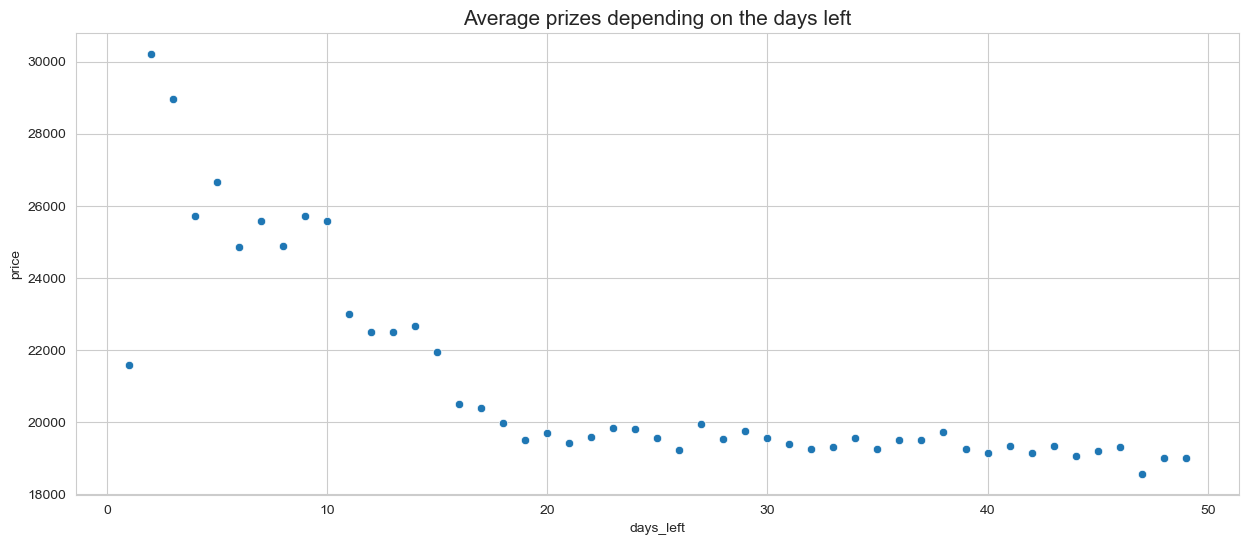

In [48]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

<Axes: xlabel='days_left', ylabel='price'>

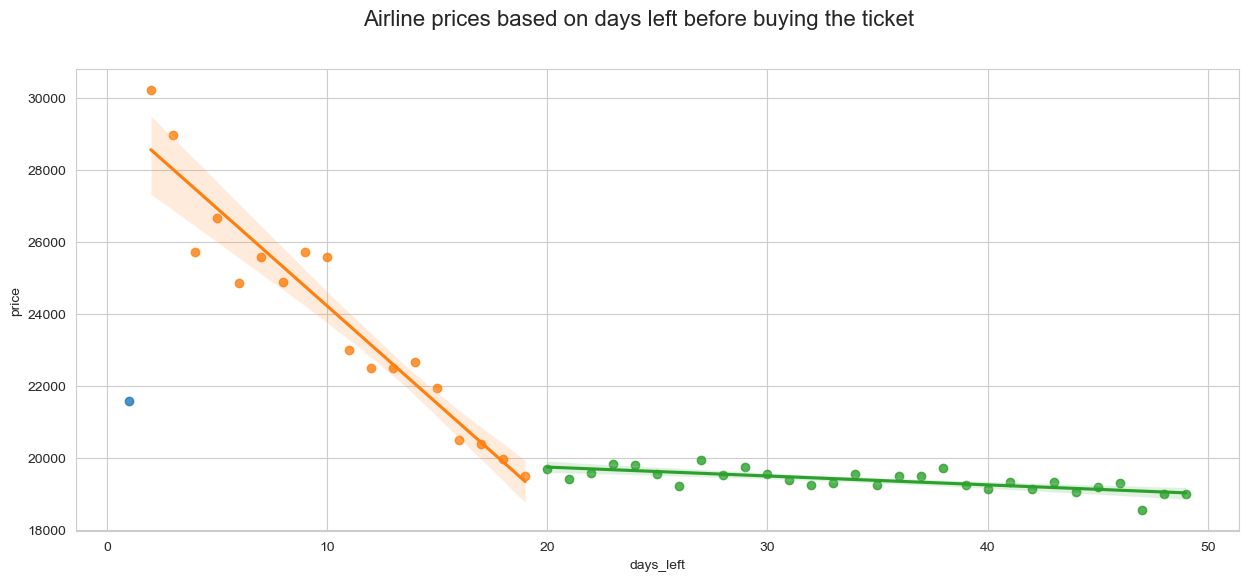

In [49]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

### ðŸ“Œ The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

### Does the price change with the duration of the flight?
Let's see how the duration of the flight may affect the final price.

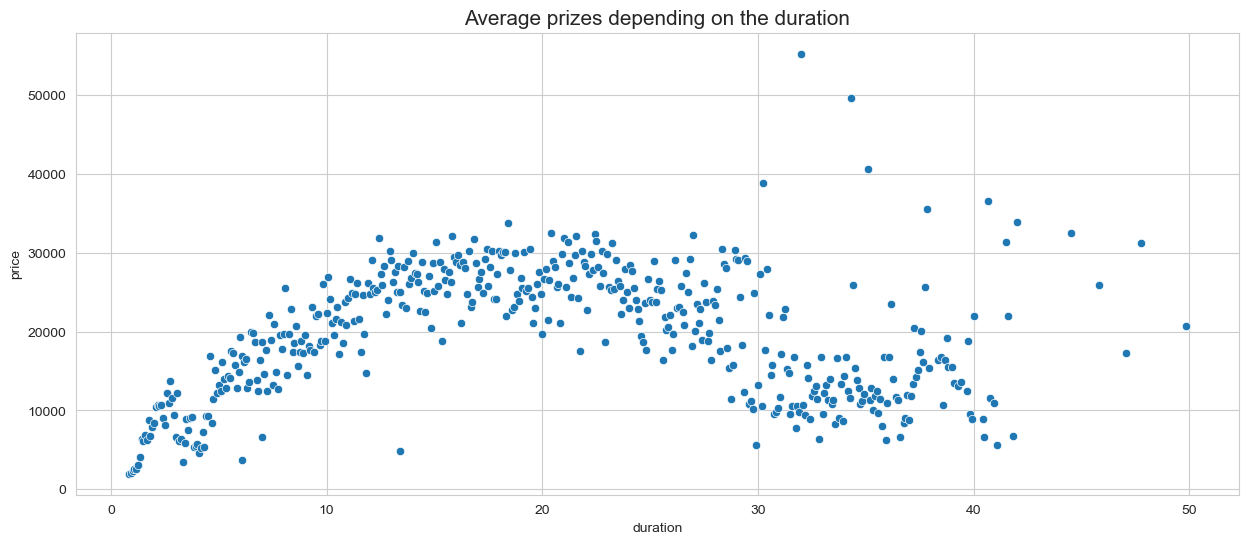

In [50]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

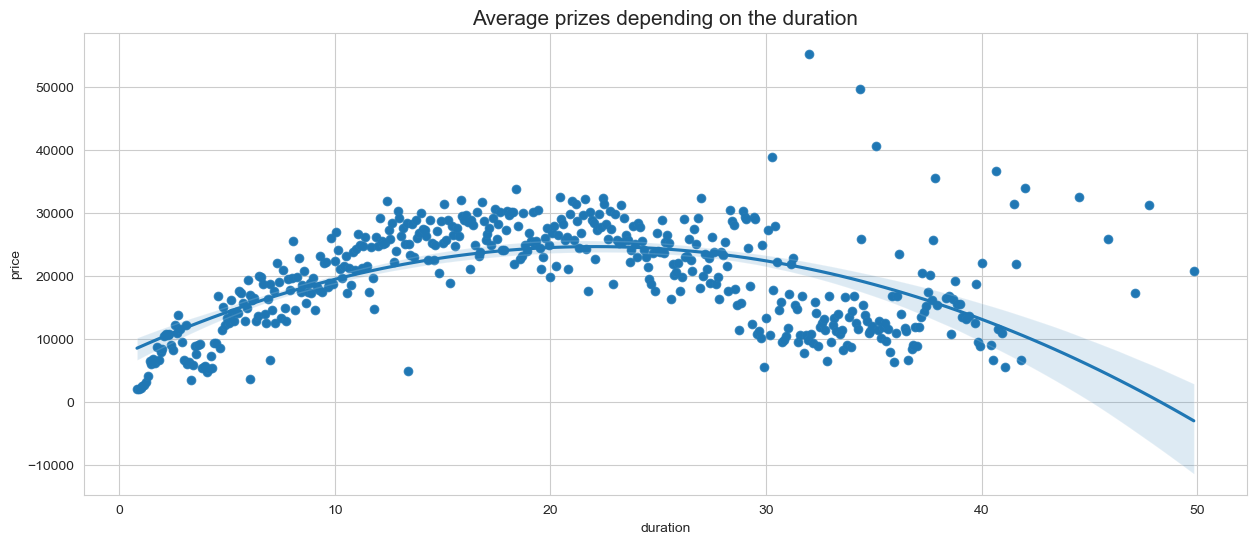

In [51]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)


### ðŸ“Œ It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again,However some outliers seem to affect the regression curve .

## Does ticket price change based on the departure time and arrival time?

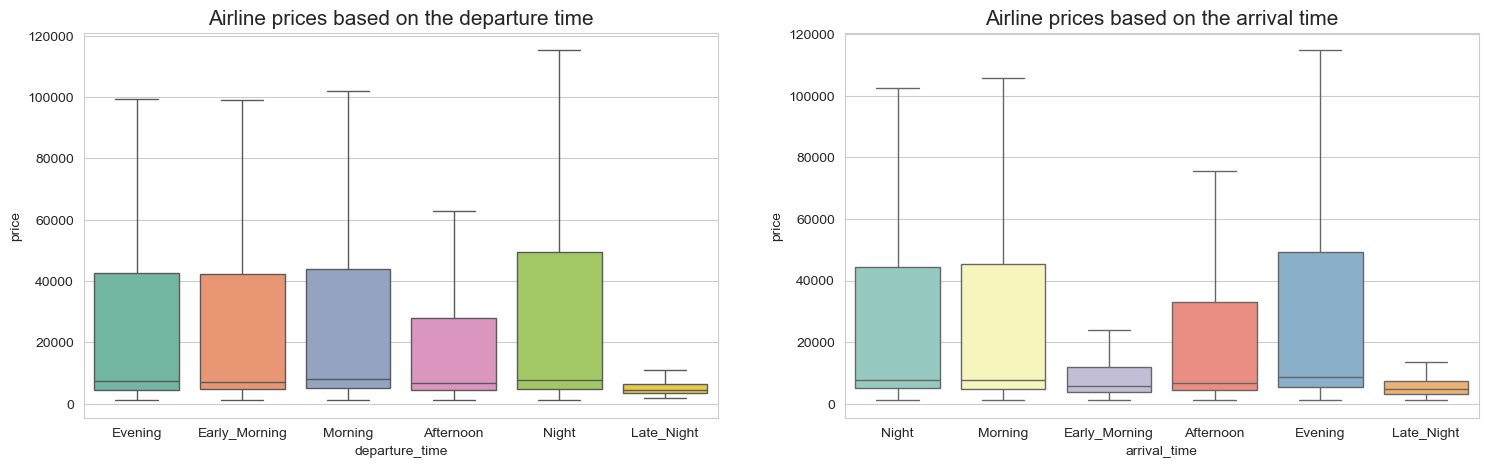

In [52]:
plt.figure(figsize=(18, 5))

# First subplot for departure time
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="price", x="departure_time", hue="departure_time", 
            showfliers=False, palette="Set2", dodge=False, legend=False).set_title("Airline prices based on the departure time", fontsize=15)
plt.legend([],[], frameon=False)  # Manually remove the legend

# Second subplot for arrival time
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="price", x="arrival_time", hue="arrival_time", 
            showfliers=False, palette="Set3", dodge=False, legend=False).set_title("Airline prices based on the arrival time", fontsize=15)
plt.legend([],[], frameon=False)  # Manually remove the legend

plt.show()

### How the price changes with change in Source and Destination?
To answer this question, I will visualize the different prices for all the destinations as a departure and arrival destination.

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

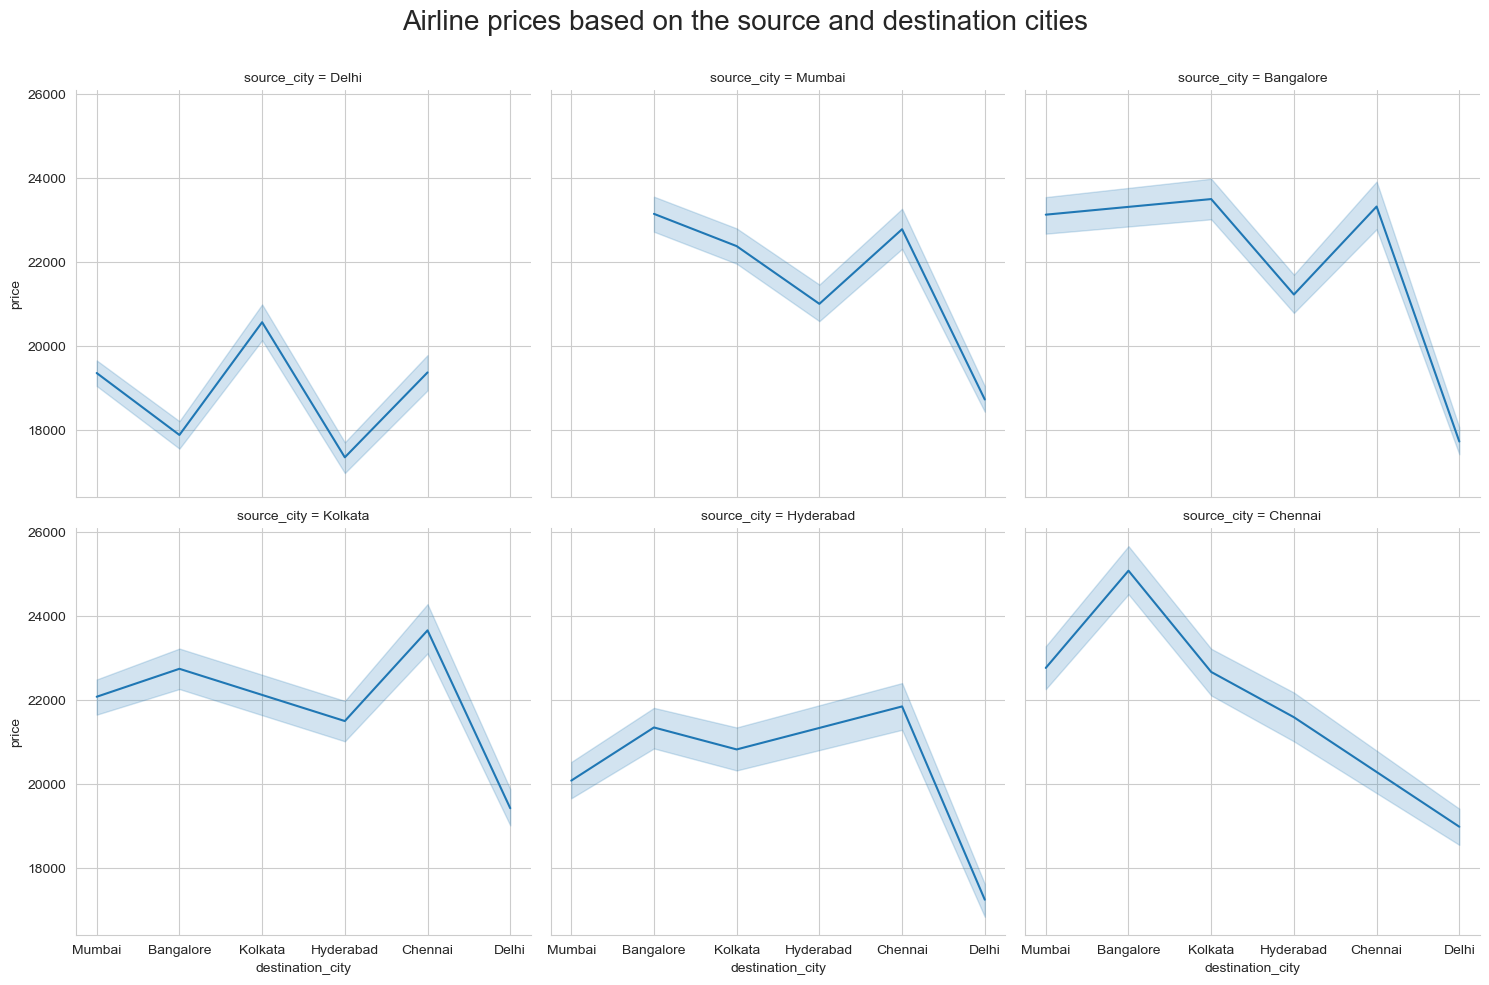

In [53]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

### Does the number of stops influences the price?
Let's see how the number of stop may influence the final price.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

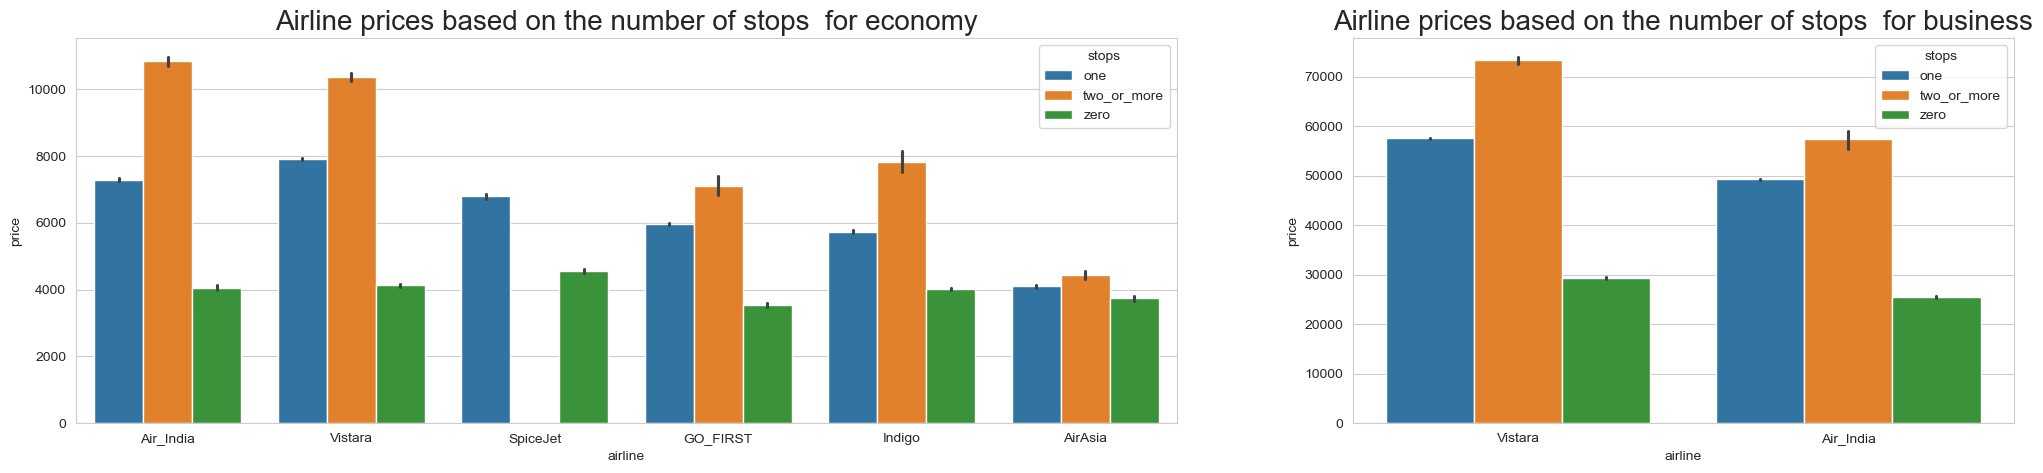

In [54]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

### What variables influence most the price?

In [55]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [56]:
df["class"] = df["class"].replace({'Economy': 0, 'Business': 1}).infer_objects(copy=False).astype(int)


C:\Users\fajal\AppData\Local\Temp\ipykernel_6588\1914248579.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({'Economy': 0, 'Business': 1}).infer_objects(copy=False).astype(int)


In [57]:
df_preprocessed = preprocessing(df)

C:\Users\fajal\AppData\Local\Temp\ipykernel_6588\1117142630.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)


### correlation matrix

<Axes: >

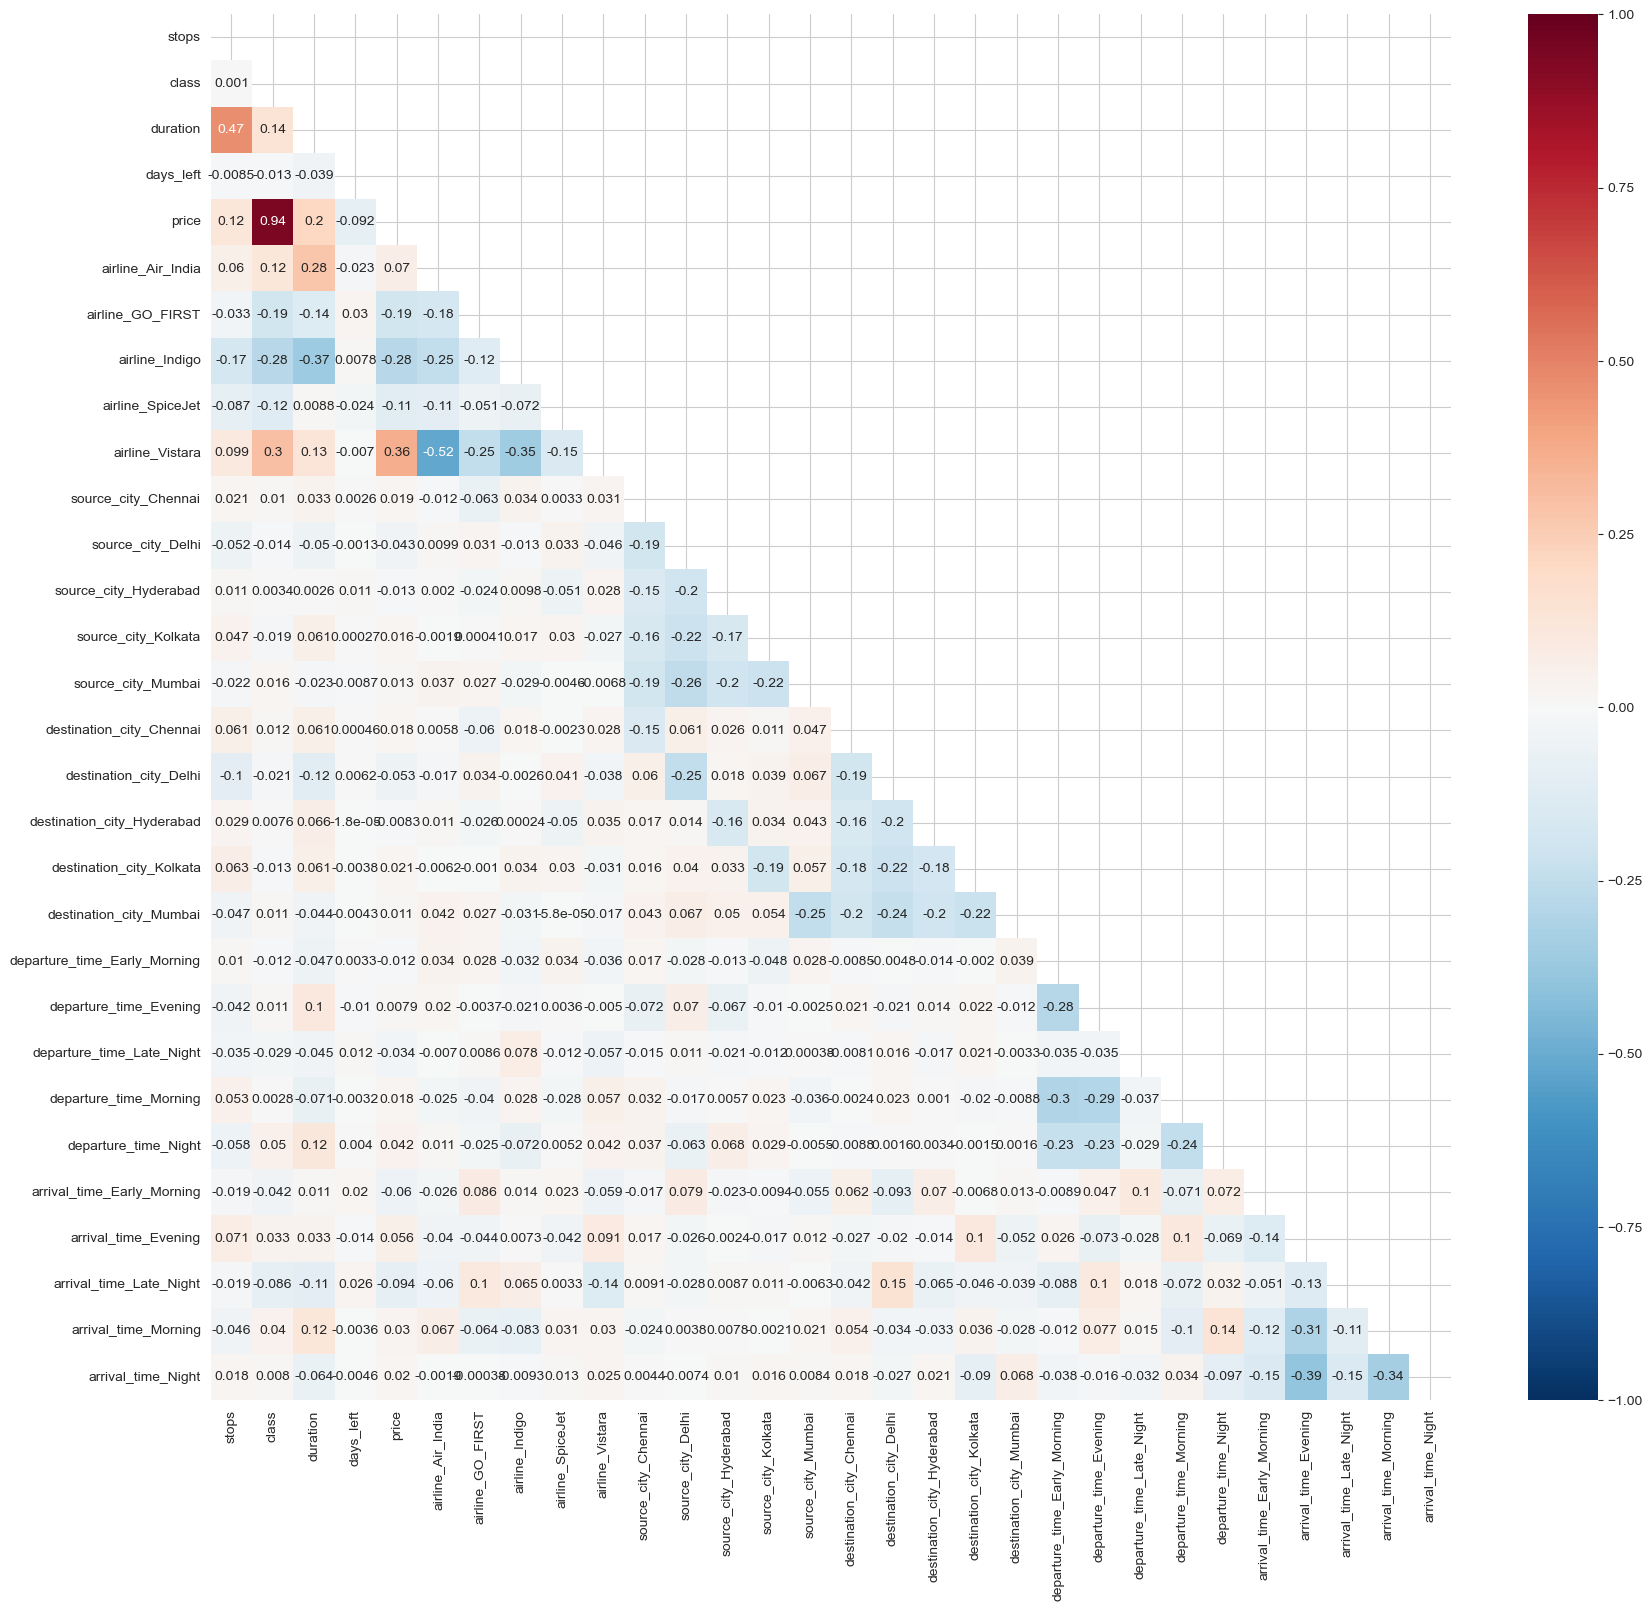

In [58]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_preprocessed.corr(), 
            mask=mask,
            annot = True,
            vmin= -1.0,
            vmax= 1.0,
            center = 0,
            cmap = 'RdBu_r')

In [59]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [60]:
X = df_preprocessed.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)


In [21]:
print(mi_scores.sort_values(ascending=False))

duration                        2.415277
class                           0.618093
airline_Vistara                 0.517385
days_left                       0.477406
source_city_Delhi               0.430462
source_city_Mumbai              0.428634
airline_Air_India               0.403297
stops                           0.392738
destination_city_Delhi          0.387216
destination_city_Mumbai         0.382443
source_city_Kolkata             0.360909
source_city_Hyderabad           0.346552
destination_city_Kolkata        0.339796
source_city_Chennai             0.325926
destination_city_Hyderabad      0.318186
destination_city_Chennai        0.302343
airline_Indigo                  0.286906
airline_GO_FIRST                0.202483
arrival_time_Evening            0.127975
arrival_time_Night              0.106256
departure_time_Evening          0.104635
arrival_time_Morning            0.102338
departure_time_Morning          0.092502
departure_time_Early_Morning    0.089224
airline_SpiceJet

## 2. Prediction of the flight price

In [61]:
def load_data():
    # Read data
    df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%201/data/dataset.csv",index_col=0)
    # Preprocessing the data
    
    df = preprocessing(df)
    
    X = df.copy()
    y = X.pop("price")
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.3, shuffle=True)
    
    return xtrain,xtest,ytrain,ytest

In [62]:
xtrain,xtest,ytrain,ytest = load_data()

C:\Users\fajal\AppData\Local\Temp\ipykernel_6588\1117142630.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
C:\Users\fajal\AppData\Local\Temp\ipykernel_6588\1117142630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)


Define the best model

In [63]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["CatBoostRegressor"]={"model":CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)}

In [64]:
def score_dataset(X, y, model=XGBRegressor()):
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    
    score_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
    score_r2 = score_r2.mean()
    
    return score_r2

In [65]:
def get_scores(models,xtrain,ytrain):
    for name,model in models.items():
        model["model"].fit(xtrain,ytrain)

        score_r2 = score_dataset(xtrain, ytrain, model=model["model"])
        score = {'model':"Linear regression", 'score_r2':score_r2}
        print("--- "+name+" ---")
        print("Score r2: {}".format(score_r2))
        print("\n")

In [66]:
get_scores(models,xtrain,ytrain)

--- KNeighborsRegressor ---
Score r2: 0.7091377415134974


--- LinearRegression ---
Score r2: 0.9095338142489371


--- XGBRegressor ---
Score r2: 0.9822407075983479


--- CatBoostRegressor ---
Score r2: 0.9734375563075298




It seems that best results are given by the XGBRegressor. This may be explain by the fact the some relationships ar enot linear like the duration or the days_left. Thus a more flexible algorithm like XGBRegressor tends to give better results.

Apply the model on the test dataset.
Let's now compute the score for the test dataset.

In [67]:
model = models["XGBRegressor"]["model"]
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

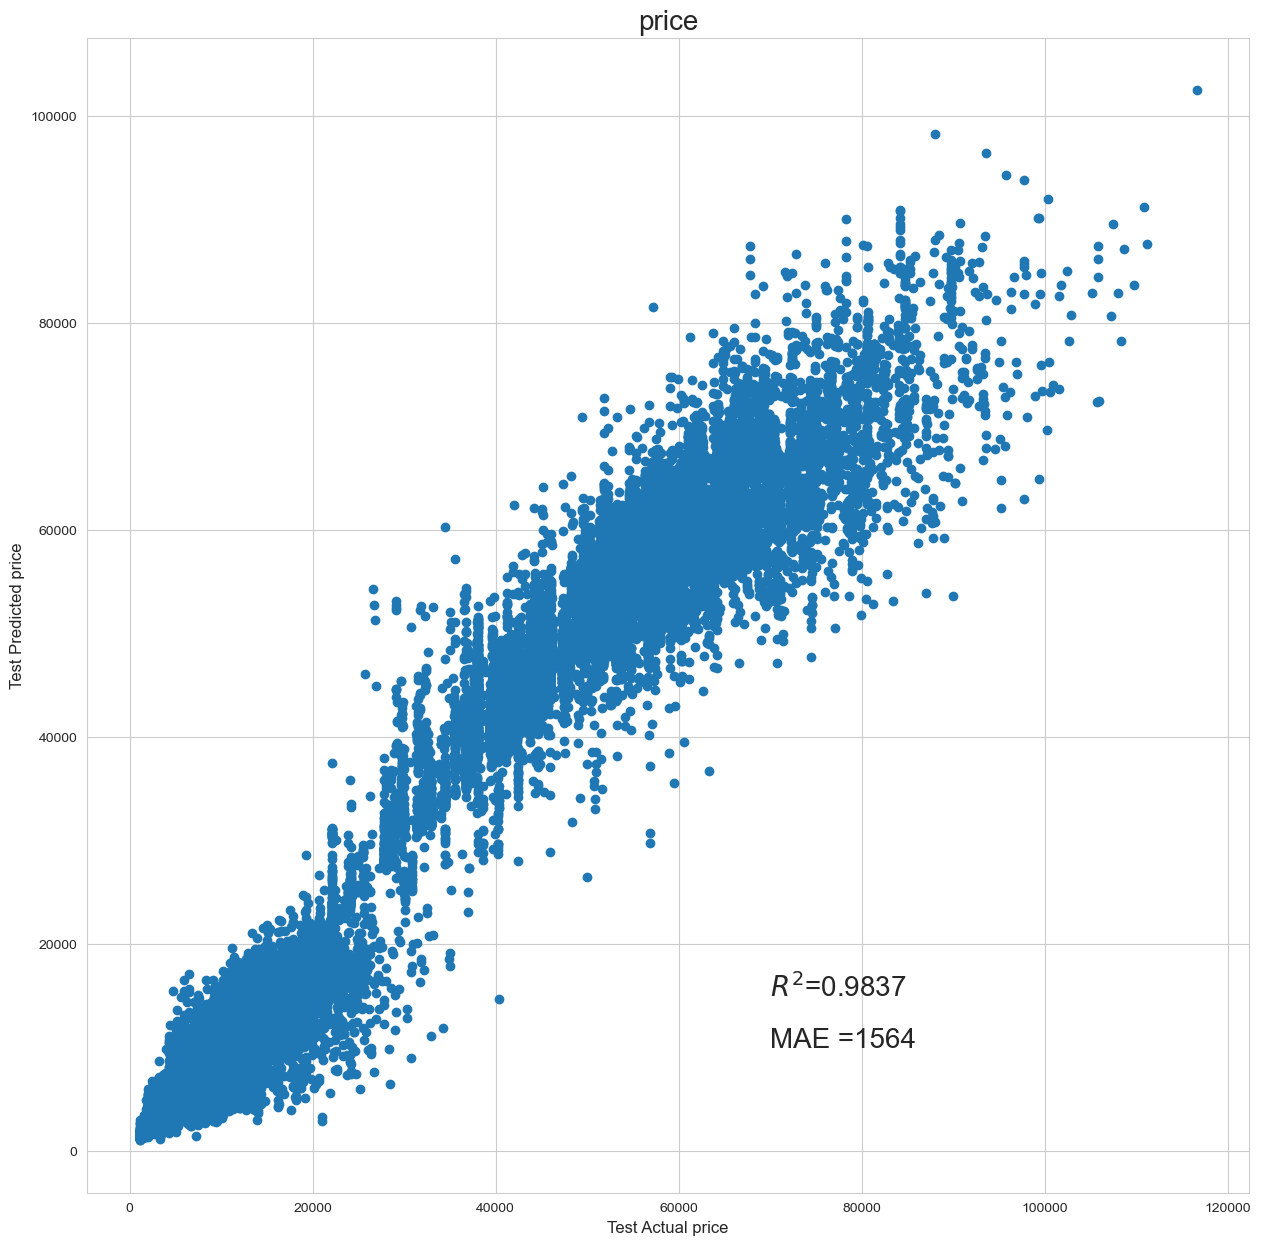

In [68]:
fig,ax = plt.subplots(figsize=(15,15))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(ytest,ypred)

score_r2 = r2_score(ytest, ypred) 
score_mae = mean_absolute_error(ytest, ypred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()

In [85]:
estimators = [
    ("XG", XGBRegressor(n_jobs=5, learning_rate=0.1, max_depth=10, random_state=1)),
    ("KNN", KNeighborsRegressor(n_neighbors=50)),
    ("Cat", CatBoostRegressor(logging_level='Silent', iterations=500, random_state=1))
]
from sklearn.ensemble import StackingRegressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor(n_jobs=5, learning_rate=0.1, max_depth=10, random_state=1))

In [87]:
stacking_regressor.fit(xtrain,ytrain)

StackingRegressor(estimators=[('XG',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=10, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=5,
                                               num_parallel_tree=None,
                                               random_state=1, ...))

In [88]:
print(xtrain.shape)
print(ytrain)
print(xtest.shape)

(210107, 29)
107174     3393
183692     4827
208304    34472
116440     9420
65996      6105
          ...  
21440     18555
117583     4792
73349      3891
267336    40862
128037     7958
Name: price, Length: 210107, dtype: int64
(90046, 29)


In [90]:
ypred=stacking_regressor.predict(xtest)

In [94]:
ypred

array([ 5923.7695,  7394.649 ,  2690.4087, ...,  7437.2305,  2708.724 ,
       75109.16  ], dtype=float32)

In [97]:
r2_score(ytest,ypred)

0.9843591354304944

# Take away points